In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('all_tass_models.csv')
columnas_modelos = ['sentiment_labelmdeberta', 'sentiment_labeldeberta', 'sentiment_labelroberta', 'sentiment_labelbart']
titulos_personalizados = ['mDeBERTa-v3-base-mnli-xnli', 'deberta-v3-large-zeroshot-v2.0', 'roberta-large-zeroshot-v2.0', 'bart-large-mnli']

In [4]:
metricas_modelos = {}

for columna_modelo in columnas_modelos:
    etiquetas_reales = df['Sentimiento']
    etiquetas_predichas = df[columna_modelo]
    
    reporte_clasificacion = classification_report(etiquetas_reales, etiquetas_predichas, output_dict=True)
    accuracy = accuracy_score(etiquetas_reales, etiquetas_predichas)
    metricas_modelos[columna_modelo] = {'Accuracy': accuracy,
                                        'Precision_Positive': reporte_clasificacion['positive']['precision'],
                                          'Recall_Positive': reporte_clasificacion['positive']['recall'],
                                          'F1_Score_Positive': reporte_clasificacion['positive']['f1-score'],
                                          'Precision_Negative': reporte_clasificacion['negative']['precision'],
                                          'Recall_Negative': reporte_clasificacion['negative']['recall'],
                                          'F1_Score_Negative': reporte_clasificacion['negative']['f1-score'],
                                          'Precision_Neutral': reporte_clasificacion['neutral']['precision'],
                                          'Recall_Neutral': reporte_clasificacion['neutral']['recall'],
                                          'F1_Score_Neutral': reporte_clasificacion['neutral']['f1-score']}

df_metricas = pd.DataFrame(metricas_modelos)

display(df_metricas)

,sentiment_labelmdeberta,sentiment_labeldeberta,sentiment_labelroberta,sentiment_labelbart
Accuracy,0.642117,0.548907,0.514384,0.584580
Precision_Positive,0.579741,0.706485,0.545238,0.527835
Recall_Positive,0.845912,0.650943,0.720126,0.805031
F1_Score_Positive,0.687980,0.677578,0.620596,0.637609
Precision_Negative,0.731959,0.803279,0.706140,0.699422
Recall_Negative,0.679426,0.468900,0.385167,0.578947
F1_Score_Negative,0.704715,0.592145,0.498452,0.633508
Precision_Neutral,0.294118,0.222892,0.257919,0.263158
Recall_Neutral,0.037594,0.556391,0.428571,0.075188
F1_Score_Neutral,0.066667,0.318280,0.322034,0.116959


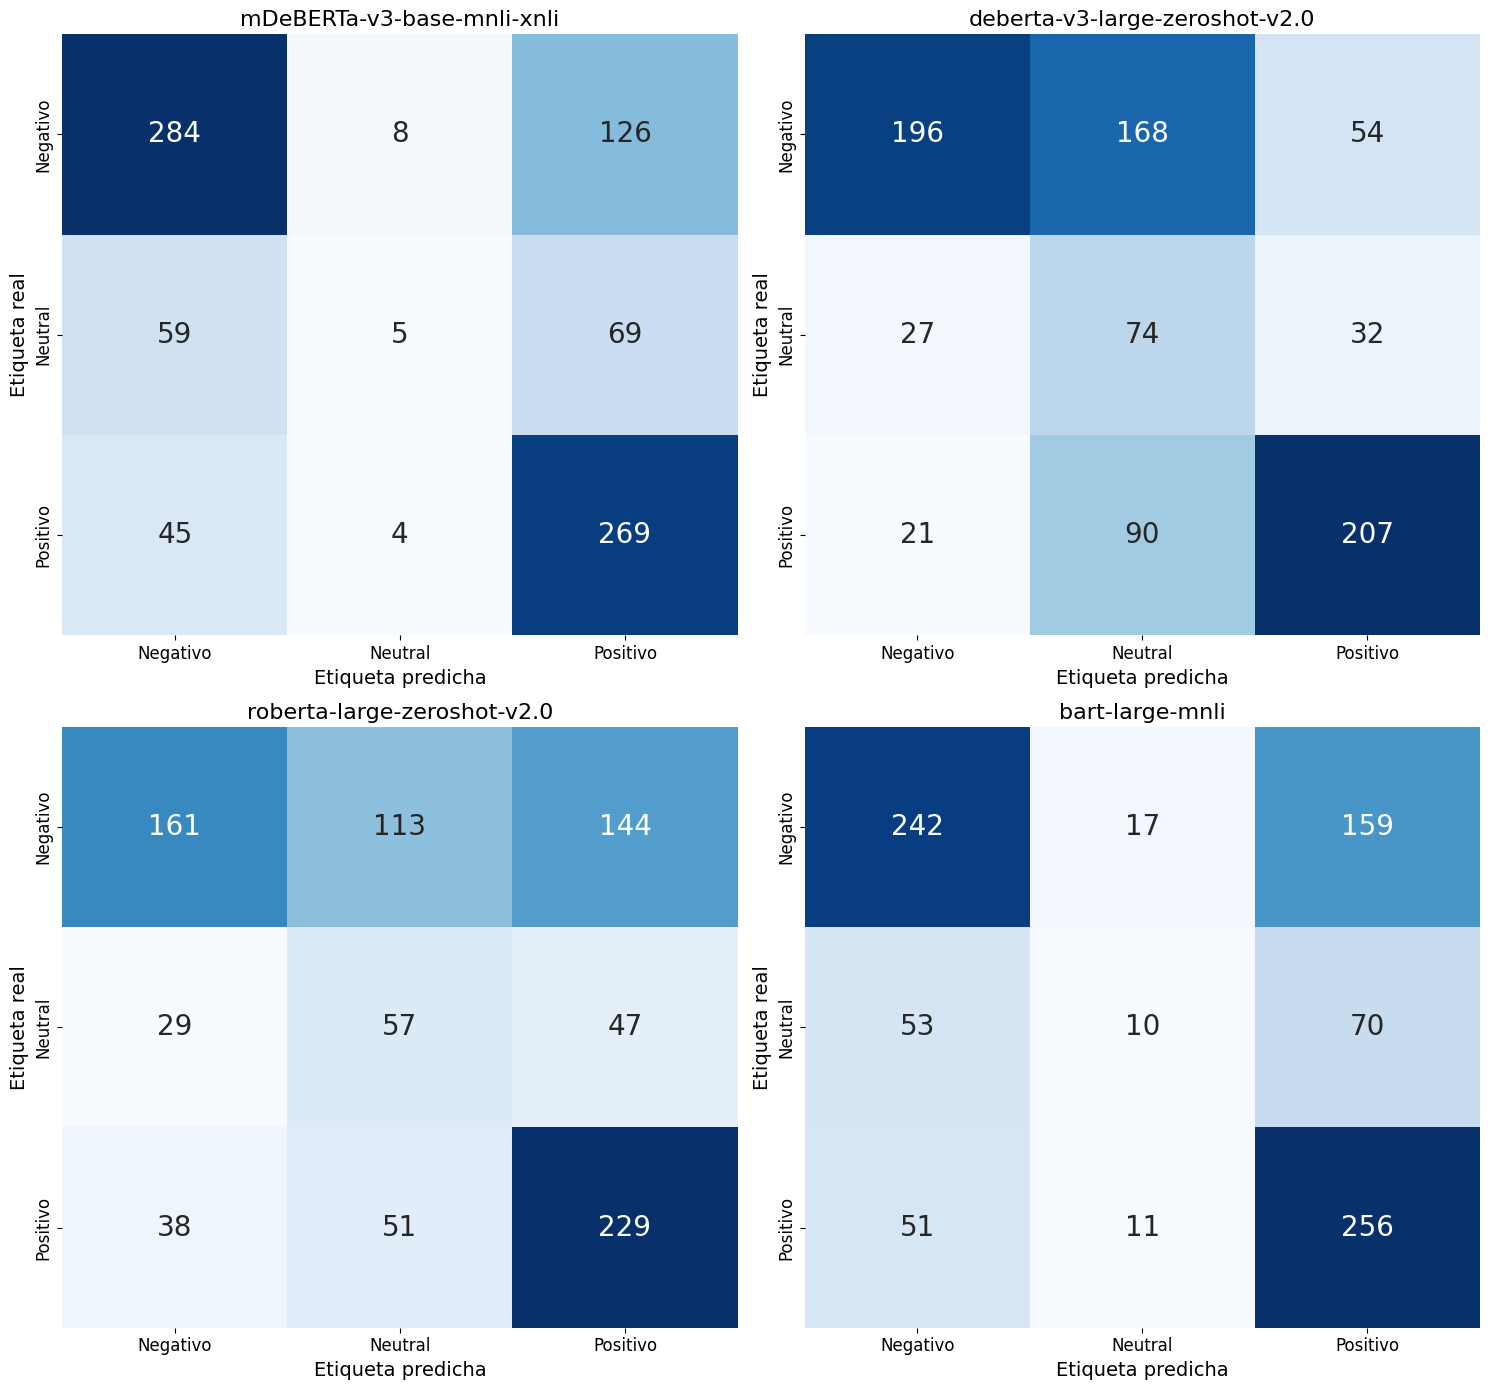

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 14))

for i, (titulo_personalizado, columna_modelo) in enumerate(zip(titulos_personalizados, columnas_modelos)):
    fila = i // 2
    columna = i % 2
    
    confusion_mat = confusion_matrix(df['Sentimiento'], df[columna_modelo])
    
    sns.heatmap(confusion_mat, annot=True, cmap='Blues', ax=axs[fila, columna], cbar=False, annot_kws={"size": 20}, fmt='d')
    
    axs[fila, columna].set_title(titulo_personalizado, fontsize=16) 
    axs[fila, columna].set_xlabel('Etiqueta predicha', fontsize=14)
    axs[fila, columna].set_ylabel('Etiqueta real', fontsize=14)
    axs[fila, columna].xaxis.set_ticklabels(['Negativo', 'Neutral', 'Positivo'], fontsize=12)
    axs[fila, columna].yaxis.set_ticklabels(['Negativo', 'Neutral', 'Positivo'], fontsize=12)

plt.tight_layout()
plt.show()

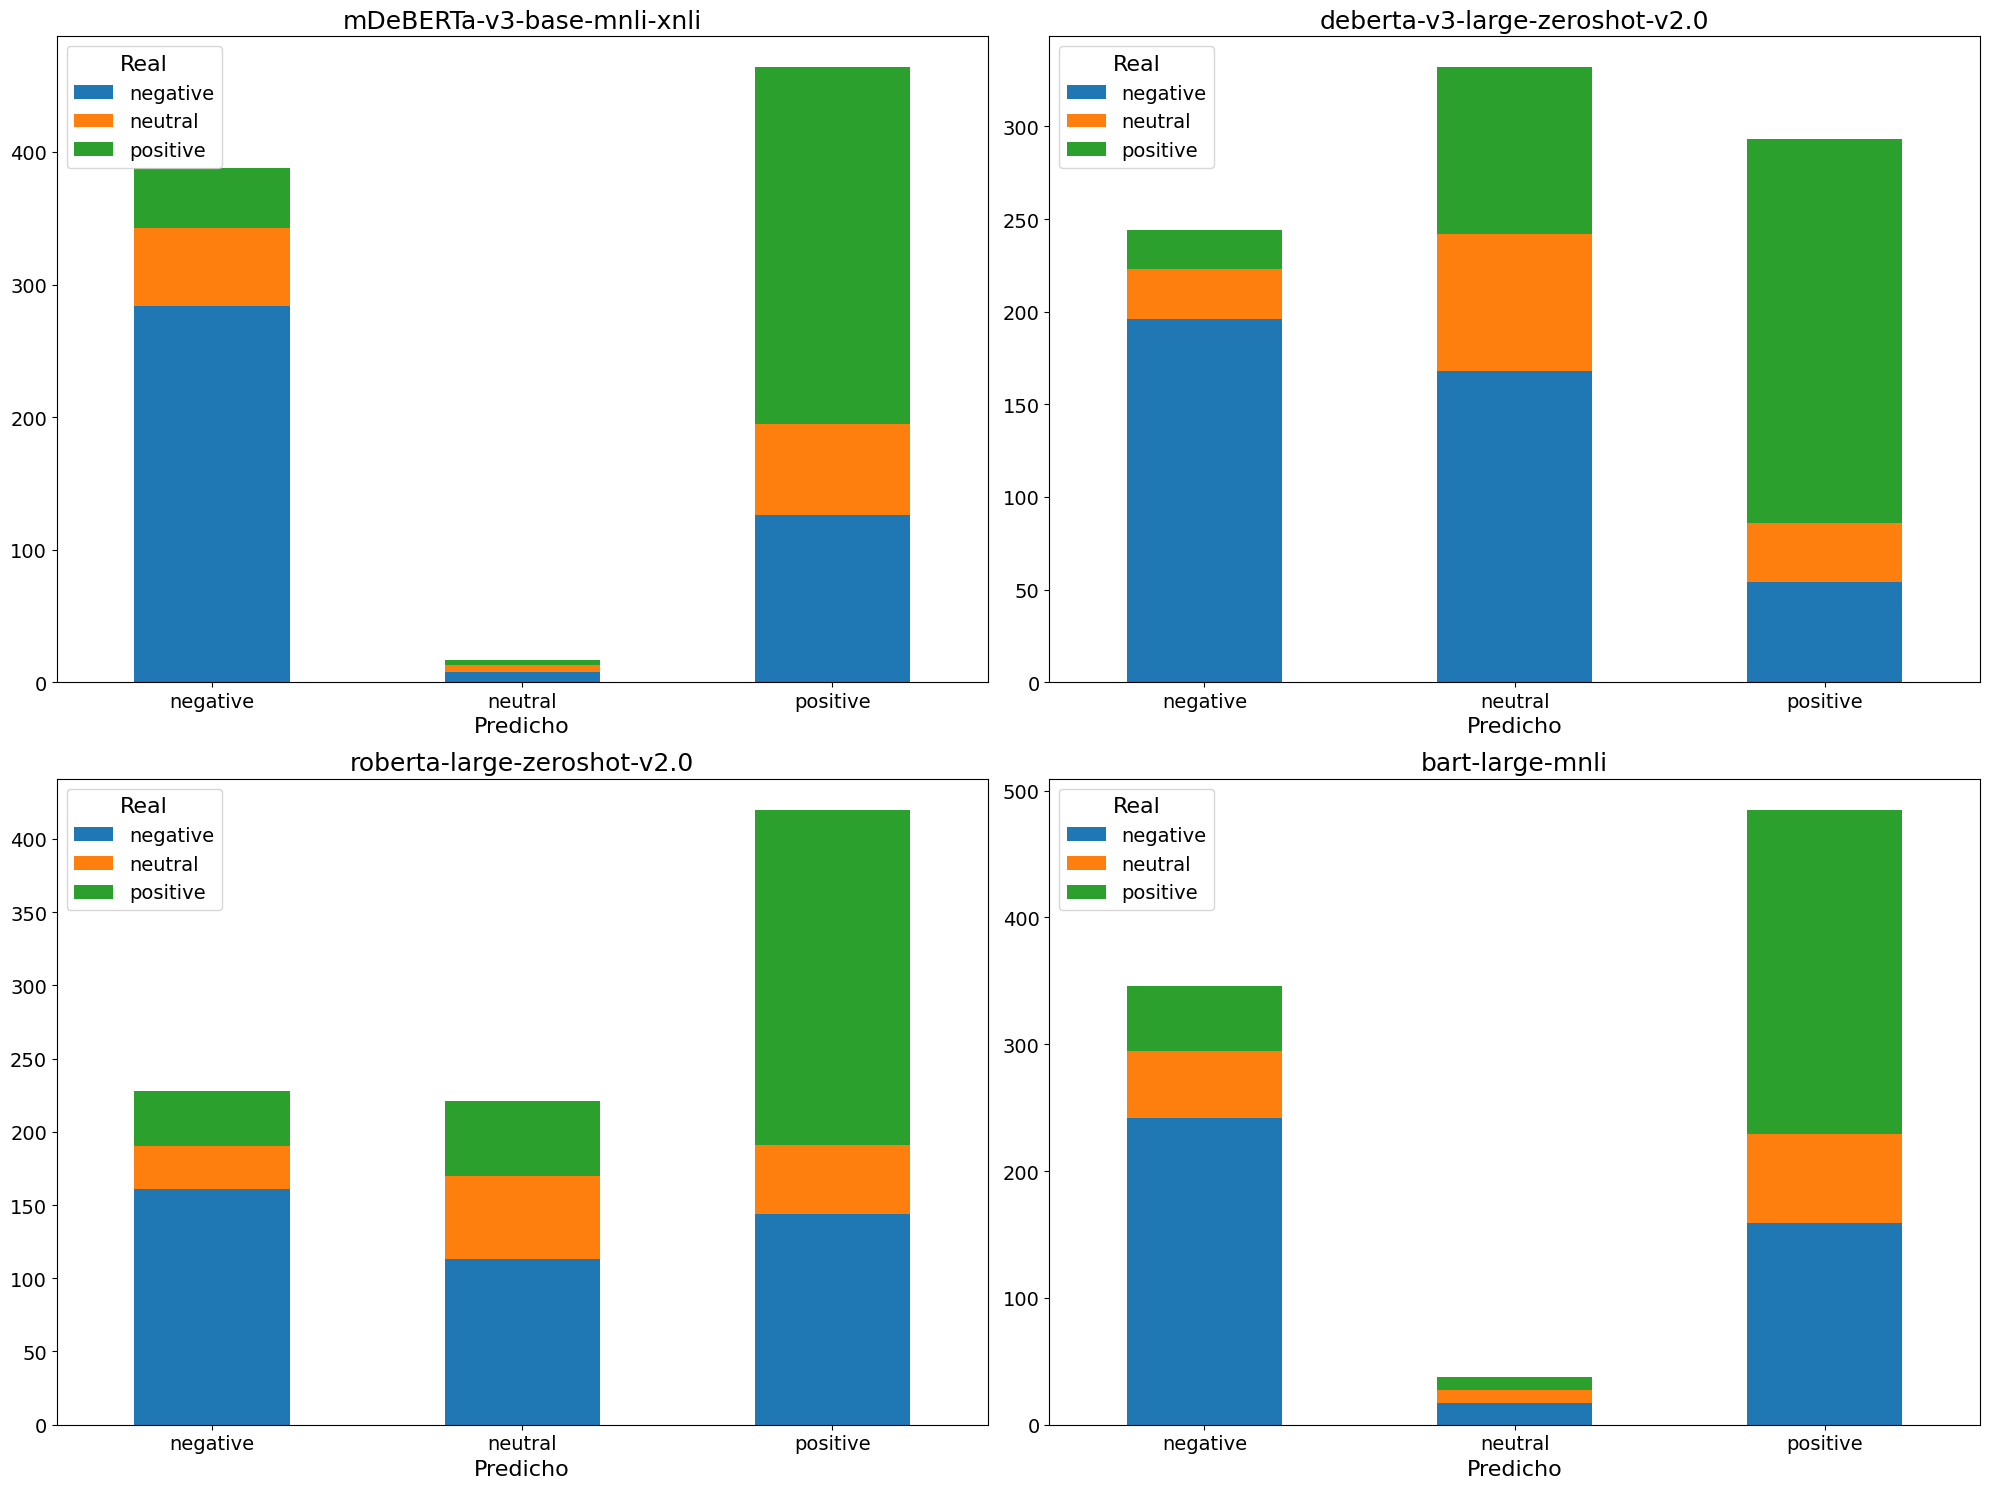

In [35]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for i, (columna_modelo, name_modelo) in enumerate(zip(columnas_modelos, titulos_personalizados)):
    fila = i // 2
    columna = i % 2
    
    age_sentiment = pd.crosstab(df[columna_modelo], df['Sentimiento'])
    
    age_sentiment.plot(kind='bar', stacked=True, ax=axs[fila, columna], figsize=(20, 15))
    
    axs[fila, columna].set_title(name_modelo, fontsize=18)
    axs[fila, columna].set_xlabel('Predicho', fontsize=16)
    axs[fila, columna].set_ylabel('', fontsize=14)
    axs[fila, columna].legend(title='Real', fontsize=14, title_fontsize=16)

    axs[fila, columna].tick_params(axis='y', which='major', labelsize=14)
    axs[fila, columna].tick_params(axis='x', which='major', labelrotation=0, labelsize=14)  # Rotación horizontal de las etiquetas del eje x

plt.tight_layout()
plt.show()
